<a href="https://colab.research.google.com/github/Pemoreira74/Trabajo-EPH/blob/main/ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install researchpy

In [3]:
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import researchpy as rp
import seaborn as sns
import matplotlib.pyplot as plt


# Especifica la ruta del archivo CSV
ruta_archivo_csv = '/content/drive/MyDrive/EPH/IFP_region_vivienda.csv'

# Crea un DataFrame desde el archivo CSV
df = pd.read_csv(ruta_archivo_csv)

# Muestra las primeras filas del DataFrame para verificar
print(df.tail(5))

         ANO4  TRIMESTRE      region  AGLOMERADO  tipo_vivienda  \
3984640  2022          4  Patagónica          93              1   
3984641  2022          4  Patagónica          93              1   
3984642  2022          4  Patagónica          93              1   
3984643  2022          4  Patagónica          93              1   
3984644  2022          4  Patagónica          93              1   

         zona_inundable  villa_emergencia  cant_miembros_hogar  promedio_ifpc  \
3984640               2                 2                    1       164000.0   
3984641               2                 2                    2        59500.0   
3984642               2                 2                    2        83000.0   
3984643               2                 2                    2        75000.0   
3984644               2                 2                    2        60000.0   

         ESTADO  
3984640       3  
3984641       3  
3984642       3  
3984643       3  
3984644       3  


In [4]:
# Dividir el DataFrame en grupos
grupos = df.groupby('region')['promedio_ifpc']

# Realizar ANOVA
resultado_anova = f_oneway(*[grupo[1] for grupo in grupos])

# Imprimir resultados
print("Estadístico F:", resultado_anova.statistic)
print("Valor p:", resultado_anova.pvalue)

# Interpretar los resultados
if resultado_anova.pvalue < 0.05:
    print("Hay diferencias significativas entre al menos dos grupos.")
else:
    print("No hay evidencia suficiente para rechazar la hipótesis nula de igualdad de medias.")


Estadístico F: 5058.478984755061
Valor p: 0.0
Hay diferencias significativas entre al menos dos grupos.


In [5]:
# Realizar prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['promedio_ifpc'], groups=df['region'], alpha=0.05)

# Imprimir resultados prueba de Tukey
print(tukey.summary())

               Multiple Comparison of Means - Tukey HSD, FWER=0.05                
      group1            group2       meandiff  p-adj    lower      upper    reject
----------------------------------------------------------------------------------
             Cuyo Gran Buenos Aires  -155.1317    0.0  -245.7347   -64.5286   True
             Cuyo               NEA -1619.7123    0.0 -1711.3561 -1528.0685   True
             Cuyo               NOA  -794.2681    0.0  -875.4523  -713.0839   True
             Cuyo          Pampeana  -166.0973    0.0  -245.0548   -87.1399   True
             Cuyo        Patagónica  2772.1166    0.0  2681.1469  2863.0863   True
Gran Buenos Aires               NEA -1464.5807    0.0 -1550.4613 -1378.7001   True
Gran Buenos Aires               NOA  -639.1364    0.0  -713.7539   -564.519   True
Gran Buenos Aires          Pampeana   -10.9657 0.9981   -83.1541    61.2227  False
Gran Buenos Aires        Patagónica  2927.2483    0.0  2842.0874  3012.4091   True
    

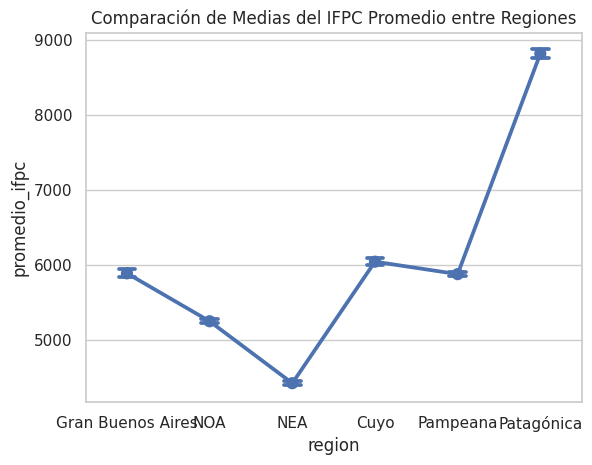

In [6]:
# Visualizar la matriz de comparación de medias
sns.set(style="whitegrid")
sns.pointplot(x='region', y='promedio_ifpc', data=df, capsize=0.2)
plt.title('Comparación de Medias del IFPC Promedio entre Regiones')
plt.show()

In [7]:
# Dividir el DataFrame en grupos
grupos = df.groupby('region')['cant_miembros_hogar']

# Realizar ANOVA
resultado_anova = f_oneway(*[grupo[1] for grupo in grupos])

# Imprimir resultados
print("Estadístico F:", resultado_anova.statistic)
print("Valor p:", resultado_anova.pvalue)

# Interpretar los resultados
if resultado_anova.pvalue < 0.05:
    print("Hay diferencias significativas entre al menos dos grupos.")
else:
    print("No hay evidencia suficiente para rechazar la hipótesis nula de igualdad de medias.")


Estadístico F: 22422.01539479329
Valor p: 0.0
Hay diferencias significativas entre al menos dos grupos.


In [8]:
# Realizar prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['cant_miembros_hogar'], groups=df['region'], alpha=0.05)

# Imprimir resultados prueba de Tukey
print(tukey.summary())

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
      group1            group2      meandiff p-adj  lower   upper  reject
-------------------------------------------------------------------------
             Cuyo Gran Buenos Aires  -0.3026   0.0 -0.3175 -0.2878   True
             Cuyo               NEA   0.2314   0.0  0.2164  0.2464   True
             Cuyo               NOA   0.5962   0.0  0.5829  0.6096   True
             Cuyo          Pampeana  -0.4119   0.0 -0.4248 -0.3989   True
             Cuyo        Patagónica  -0.4351   0.0 -0.4501 -0.4202   True
Gran Buenos Aires               NEA    0.534   0.0  0.5199  0.5481   True
Gran Buenos Aires               NOA   0.8989   0.0  0.8866  0.9111   True
Gran Buenos Aires          Pampeana  -0.1093   0.0 -0.1211 -0.0974   True
Gran Buenos Aires        Patagónica  -0.1325   0.0 -0.1465 -0.1185   True
              NEA               NOA   0.3648   0.0  0.3524  0.3773   True
              NEA          Pampeana  -

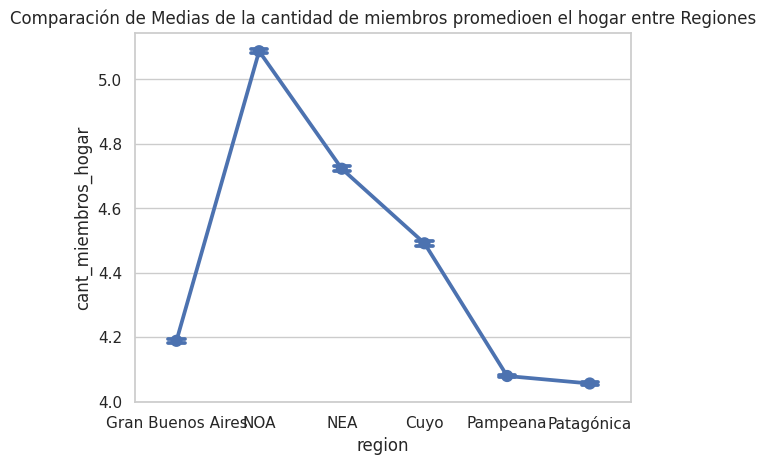

In [9]:
# Visualizar la matriz de comparación de medias
sns.set(style="whitegrid")
sns.pointplot(x='region', y='cant_miembros_hogar', data=df, capsize=0.2)
plt.title('Comparación de Medias de la cantidad de miembros promedioen el hogar entre Regiones')
plt.show()

In [20]:
#Nivel educativo
# Especifica la ruta del archivo CSV
ruta_archivo_csv = '/content/drive/MyDrive/EPH/IFP_educ.csv'

# Crea un DataFrame desde el archivo CSV
df_ed = pd.read_csv(ruta_archivo_csv)

# Muestra las primeras filas del DataFrame para verificar
print(df_ed.tail(5))

         ANO4  TRIMESTRE             region  AGLOMERADO  sexo  edad  \
1591678  2022          4  Gran Buenos Aires          33     1    34   
1591679  2022          4                NOA          29     1    58   
1591680  2022          4           Pampeana          36     1    52   
1591681  2022          4  Gran Buenos Aires          32     2    62   
1591682  2022          4         Patagónica          31     1    37   

         analfabetismo                NIVEL_ED  promedio_ifpc  ESTADO  
1591678              1     Secundaria Completa      815000.00       1  
1591679              1  Superior Univ Completa      850000.00       1  
1591680              1     Secundaria Completa      968000.00       1  
1591681              1  Superior Univ Completa     1142000.00       1  
1591682              1     Secundaria Completa     1766666.67       1  


In [21]:
# Dividir el DataFrame en grupos
grupos = df_ed.groupby('NIVEL_ED')['promedio_ifpc']

# Realizar ANOVA
resultado_anova = f_oneway(*[grupo[1] for grupo in grupos])

# Imprimir resultados
print("Estadístico F:", resultado_anova.statistic)
print("Valor p:", resultado_anova.pvalue)

# Interpretar los resultados
if resultado_anova.pvalue < 0.05:
    print("Hay diferencias significativas entre al menos dos grupos.")
else:
    print("No hay evidencia suficiente para rechazar la hipótesis nula de igualdad de medias.")


Estadístico F: 7552.6383753130585
Valor p: 0.0
Hay diferencias significativas entre al menos dos grupos.


In [22]:
# Realizar prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df_ed['promedio_ifpc'], groups=df_ed['NIVEL_ED'], alpha=0.05)

# Imprimir resultados prueba de Tukey
print(tukey.summary())

                      Multiple Comparison of Means - Tukey HSD, FWER=0.05                       
         group1                   group2           meandiff  p-adj    lower      upper    reject
------------------------------------------------------------------------------------------------
       Primaria Completa Primaria Inc c/educ esp.  -720.0688    0.0  -942.8632  -497.2744   True
       Primaria Completa      Secundaria Completa  3602.4697    0.0  3467.2787  3737.6607   True
       Primaria Completa    Secundaria Incompleta  1140.7761    0.0    994.409  1287.1433   True
       Primaria Completa          Sin instrucción  -243.0889 0.9401   -920.511   434.3332  False
       Primaria Completa   Superior Univ Completa  8948.7893    0.0  8803.9999  9093.5788   True
       Primaria Completa Superior Univ Incompleta  4659.7687    0.0  4501.4039  4818.1335   True
Primaria Inc c/educ esp.      Secundaria Completa  4322.5385    0.0  4108.2179  4536.8591   True
Primaria Inc c/educ esp.    Se

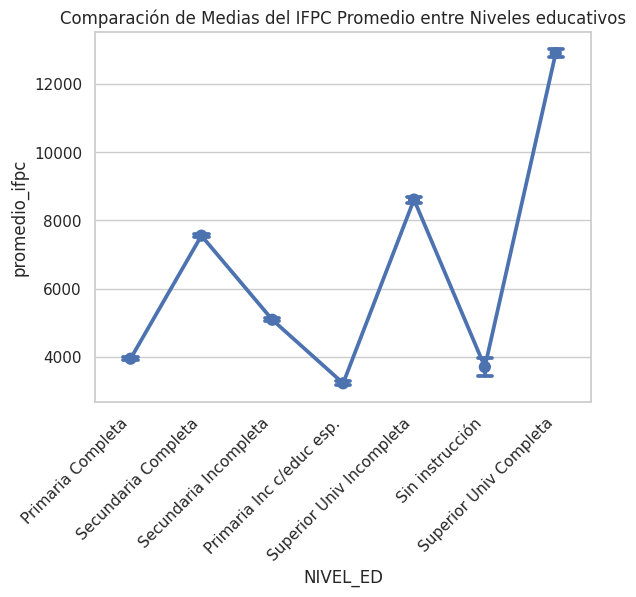

In [23]:
# Visualizar la matriz de comparación de medias
sns.set(style="whitegrid")
sns.pointplot(x='NIVEL_ED', y='promedio_ifpc', data=df_ed, capsize=0.2)
plt.title('Comparación de Medias del IFPC Promedio entre Niveles educativos')
# Orientar la leyenda del eje x a 45 grados
# Orientar la leyenda del eje x a 45 grados
plt.xticks(rotation=45, ha='right')
plt.show()